<a href="https://colab.research.google.com/github/IEXE-Tec/aprendizaje-maquina-2/blob/master/07_Procesamiento_del_Lenguaje_Natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing pycaret library:
+ https://towardsdatascience.com/announcing-pycaret-2-0-39c11014540e 
+ https://pycaret.org/


In [ ]:
!pip install pycaret

In [2]:
from pycaret.utils import version
version()

'2.2.0'

Installing Autocorrect:
+ https://github.com/phatpiglet/autocorrect


In [3]:
!pip install autocorrect

In [4]:
import nltk
import pycaret

# Processing

## I. Tokenization

In [5]:
# importar el modulo de tokenizacion de nltk
from nltk.tokenize import sent_tokenize,word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
example_text = "Esto es un ejemplo. O noooo?"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Esto es un ejemplo.', 'O noooo?']
['Esto', 'es', 'un', 'ejemplo', '.', 'O', 'noooo', '?']


In [7]:
# Texto de ejemplo. Ene ste caso usamos las tres comillas para separar
# el texto en varias lineas dentro de nuestro codigo.
example_text = ''' Hola mi nombre es Mario. Mi cuenta de github
es uumami. Estas listo para convertirte en un experto de NLP.
Ezta horacion contiene muchos erroress gramaticales.
'''
print(example_text)
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

 Hola mi nombre es Mario. Mi cuenta de github
es uumami. Estas listo para convertirte en un experto de NLP.
Ezta horacion contiene muchos erroress gramaticales.

[' Hola mi nombre es Mario.', 'Mi cuenta de github\nes uumami.', 'Estas listo para convertirte en un experto de NLP.', 'Ezta horacion contiene muchos erroress gramaticales.']
['Hola', 'mi', 'nombre', 'es', 'Mario', '.', 'Mi', 'cuenta', 'de', 'github', 'es', 'uumami', '.', 'Estas', 'listo', 'para', 'convertirte', 'en', 'un', 'experto', 'de', 'NLP', '.', 'Ezta', 'horacion', 'contiene', 'muchos', 'erroress', 'gramaticales', '.']


In [8]:
texto = word_tokenize(example_text)

# II. Spell check

In [9]:
from autocorrect import Speller

In [10]:
spell = Speller(lang='es')

In [11]:
corrected_text = [spell(i) for i in texto]
corrected_text

['Hola',
 'mi',
 'nombre',
 'es',
 'Mario',
 '.',
 'Mi',
 'cuenta',
 'de',
 'github',
 'es',
 'umami',
 '.',
 'Estas',
 'listo',
 'para',
 'convertirte',
 'en',
 'un',
 'experto',
 'de',
 'LP',
 '.',
 'Esta',
 'horacio',
 'contiene',
 'muchos',
 'errores',
 'gramaticales',
 '.']

## III. Stopwords

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stopwords_en = stopwords.words('english')

counter = 0
for w in stopwords_en:
  print(w, end=', ')
  counter += 1
  if (counter%10)== 0:
    print()


i, me, my, myself, we, our, ours, ourselves, you, you're, 
you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, 
himself, she, she's, her, hers, herself, it, it's, its, itself, 
they, them, their, theirs, themselves, what, which, who, whom, this, 
that, that'll, these, those, am, is, are, was, were, be, 
been, being, have, has, had, having, do, does, did, doing, 
a, an, the, and, but, if, or, because, as, until, 
while, of, at, by, for, with, about, against, between, into, 
through, during, before, after, above, below, to, from, up, down, 
in, out, on, off, over, under, again, further, then, once, 
here, there, when, where, why, how, all, any, both, each, 
few, more, most, other, some, such, no, nor, not, only, 
own, same, so, than, too, very, s, t, can, will, 
just, don, don't, should, should've, now, d, ll, m, o, 
re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, 
doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, 
ma, mightn, might

In [14]:
stopwords_es = stopwords.words('spanish')

counter = 0
for w in stopwords_es:
  print(w, end=', ')
  counter += 1
  if (counter%10)== 0:
    print()


de, la, que, el, en, y, a, los, del, se, 
las, por, un, para, con, no, una, su, al, lo, 
como, más, pero, sus, le, ya, o, este, sí, porque, 
esta, entre, cuando, muy, sin, sobre, también, me, hasta, hay, 
donde, quien, desde, todo, nos, durante, todos, uno, les, ni, 
contra, otros, ese, eso, ante, ellos, e, esto, mí, antes, 
algunos, qué, unos, yo, otro, otras, otra, él, tanto, esa, 
estos, mucho, quienes, nada, muchos, cual, poco, ella, estar, estas, 
algunas, algo, nosotros, mi, mis, tú, te, ti, tu, tus, 
ellas, nosotras, vosotros, vosotras, os, mío, mía, míos, mías, tuyo, 
tuya, tuyos, tuyas, suyo, suya, suyos, suyas, nuestro, nuestra, nuestros, 
nuestras, vuestro, vuestra, vuestros, vuestras, esos, esas, estoy, estás, está, 
estamos, estáis, están, esté, estés, estemos, estéis, estén, estaré, estarás, 
estará, estaremos, estaréis, estarán, estaría, estarías, estaríamos, estaríais, estarían, estaba, 
estabas, estábamos, estabais, estaban, estuve, estuviste, estuvo, estuvimos, estuvi

In [15]:
def print_text(texx = [], module=10, sep=' '):
  counter = 0
  for w in texx:
    print(w, end=sep)
    counter += 1
    if (counter % module)== 0:
      print()
  print('\n ------- Tamano del texto: ', len(texx))
  print()

In [16]:
# Removamos las stopwords de nuestro texto
print('\n Texto corregido:')
print_text(corrected_text, module=11)

short_text = [w for w in corrected_text if w not in stopwords_es]
print('\n Texto sin stopwords:')
print_text(short_text, module=11)


 Texto corregido:
Hola mi nombre es Mario . Mi cuenta de github es 
umami . Estas listo para convertirte en un experto de LP 
. Esta horacio contiene muchos errores gramaticales . 
 ------- Tamano del texto:  30


 Texto sin stopwords:
Hola nombre Mario . Mi cuenta github umami . Estas listo 
convertirte experto LP . Esta horacio contiene errores gramaticales . 
 ------- Tamano del texto:  21



## IV. Stemmer

In [17]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [18]:
[stemmer.stem(i) for i in ['corriendo', 'correr', 'corremos',
                           'corriamos','corrian', 
                           'correlacion', 'correlacionado']]

['corr', 'corr', 'corr', 'corri', 'corri', 'correlacion', 'correlacion']

In [19]:
stemmed_text = [stemmer.stem(i) for i in corrected_text]
print_text(stemmed_text, module=11)

hol mi nombr es mari . mi cuent de github es 
umami . estas list par convertirt en un expert de lp 
. esta horaci contien much error gramatical . 
 ------- Tamano del texto:  30



## V. Lemmatizing

Dado que el texto que estamos anlizaando se encuenntra en espanol, es necesario buscar una funcion disenyada para nuestra lengua.  
En este nos puede ayudar spacy.  
+ spacy: https://spacy.io/usage 
+ spanish lemmatizer: https://spacy.io/models/es#es_core_news_sm 

In [ ]:
!python3 -m spacy download es_core_news_sm

In [21]:
# Importar spacy y el lemmatizer en espanyol
import spacy
import es_core_news_sm
nlp = es_core_news_sm.load()

In [22]:
ex_lem = "Hola estoy aprendiendo a utilizar inteligencia artificial. \n"
print(ex_lem)
ex_lem = word_tokenize(ex_lem)
for w in ex_lem:
  doc = nlp(w)
  for word in doc:
    print(word.text, "=>", word.lemma_)

Hola estoy aprendiendo a utilizar inteligencia artificial. 

Hola => Hola
estoy => estar
aprendiendo => aprender
a => a
utilizar => utilizar
inteligencia => inteligencia
artificial => artificial
. => .


Creemos una funcion que lemamtize un texto que ya este separado en tokens (tokenized/tokenizado).

In [23]:
def lemm_es(txx=[]):
  '''
  txx is a list or tokenized text
  retunrs: lemmatized words.
  '''
  lemm_text = []
  for w in txx:
    lemm_text.append(nlp(w)[0].lemma_)
  return lemm_text

Apliquemos el lemmatizer a nuestro texto corregido, y sin stopwords.

In [24]:
lemm_text = lemm_es(short_text)

print_text(short_text, module=11)
print_text(lemm_text, module=11)

Hola nombre Mario . Mi cuenta github umami . Estas listo 
convertirte experto LP . Esta horacio contiene errores gramaticales . 
 ------- Tamano del texto:  21

Hola nombrar Mario . Mi contar github umami . Estas listar 
convertirte experto LP . Esta horacio contener error gramatical . 
 ------- Tamano del texto:  21



## VI. Tag

In [25]:
def pos_es(txx=[]):
  '''
  txx is a list or tokenized text
  retunrs: lemmatized words.
  '''
  pos_text = []
  for w in txx:
    pos_text.append(nlp(w)[0].pos_)
  return pos_text

In [26]:
pos_text = pos_es(short_text)

print_text(short_text, module=11)
print_text(pos_text, module=11)

Hola nombre Mario . Mi cuenta github umami . Estas listo 
convertirte experto LP . Esta horacio contiene errores gramaticales . 
 ------- Tamano del texto:  21

PROPN NOUN PROPN PUNCT DET VERB PROPN PROPN PUNCT PRON ADJ 
PROPN ADJ NOUN PUNCT PRON ADV VERB NOUN ADJ PUNCT 
 ------- Tamano del texto:  21



# Bag of Words (Bolsa de Palabras)

https://es.wikipedia.org/wiki/Modelo_bolsa_de_palabras 

En esta seccion realizaremos analisis de sentimientos de twitter. La idea es clasificar si un twitt expresa senetimientos positivos o negativos.  
Este proyecto nos podria ayudar a evaluar el valor de nuestra marca, la aceptacion de un nuevo producto en el mercado, o analizar tendencias de la bolsa de valores.  

Si aplicaramos el analisis de sentimientos a los datos de nuestra start-up podriamos detectar anomalias al momento de contratacion o detectar renuncias antes de tiempo por ejemplo.


## Procesamiento de Datos

Primero creemos funciones que funcionen a nivel twitt (individual). Posteriormente aplicaremos las funciones a toda la base de datos. De esta forma mantendremos el codigo mas modular.

### Importar base de datos de twitter

In [107]:
# Importemos los datos
from nltk.corpus import twitter_samples
nltk.download('twitter_samples')

positive_tweets_ = twitter_samples.strings('positive_tweets.json')
negative_tweets_ = twitter_samples.strings('negative_tweets.json')
print('\n Glipse Data')
positive_tweets_[0:5]

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!

 Glipse Data


['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days']

In [59]:
import pandas as pd

positive_tweets = twitter_samples.tokenized('positive_tweets.json')
negative_tweets = twitter_samples.tokenized('negative_tweets.json')

print('\n Glipse Tokenized Data')
positive_tweets[0]


 Glipse Tokenized Data


['#FollowFriday',
 '@France_Inte',
 '@PKuchly57',
 '@Milipol_Paris',
 'for',
 'being',
 'top',
 'engaged',
 'members',
 'in',
 'my',
 'community',
 'this',
 'week',
 ':)']

### Lemmatizing y normalizacion

Dado que esta vez estamos analizando los datos en ingles, podemos utilizar las funciones de nltk directamente.  

En vez de utilizar el algoritmo de SpaCy, utilizaremos los algoritmos de nltk directamente. En este caso la **lematizacion** sera llevada acabo por el algoritmo *wordnet*.   
 (https://www.nltk.org/_modules/nltk/corpus/reader/wordnet.html)  
Pero en conjunto con *averaged_perceptron_tagger* que nos ayuda a mejorar nuestro proceso de lemmatizing pues toma en cuenta el tag que se el asigna dentro de la oracion.  
(https://www.nltk.org/_modules/nltk/tag/perceptron.html)  
  
  Si deseas entender a mayor profundidar como funcionan los algoritmos de lemmatizacion de nltk y SpaCy revisa la siguiente documentacion:
  https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#wordnetlemmatizerwithappropriatepostag 

In [42]:
import nltk
# Lemmatizer
nltk.download('wordnet')
# Tagger
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Creemos una funcion para lemmatizar usando los dos algoritmos que acabamos de importar. Dado que los tags producidos por el algoritmo pos_tag son diferentes a los que usa wordnet, es necesario codificarlos.

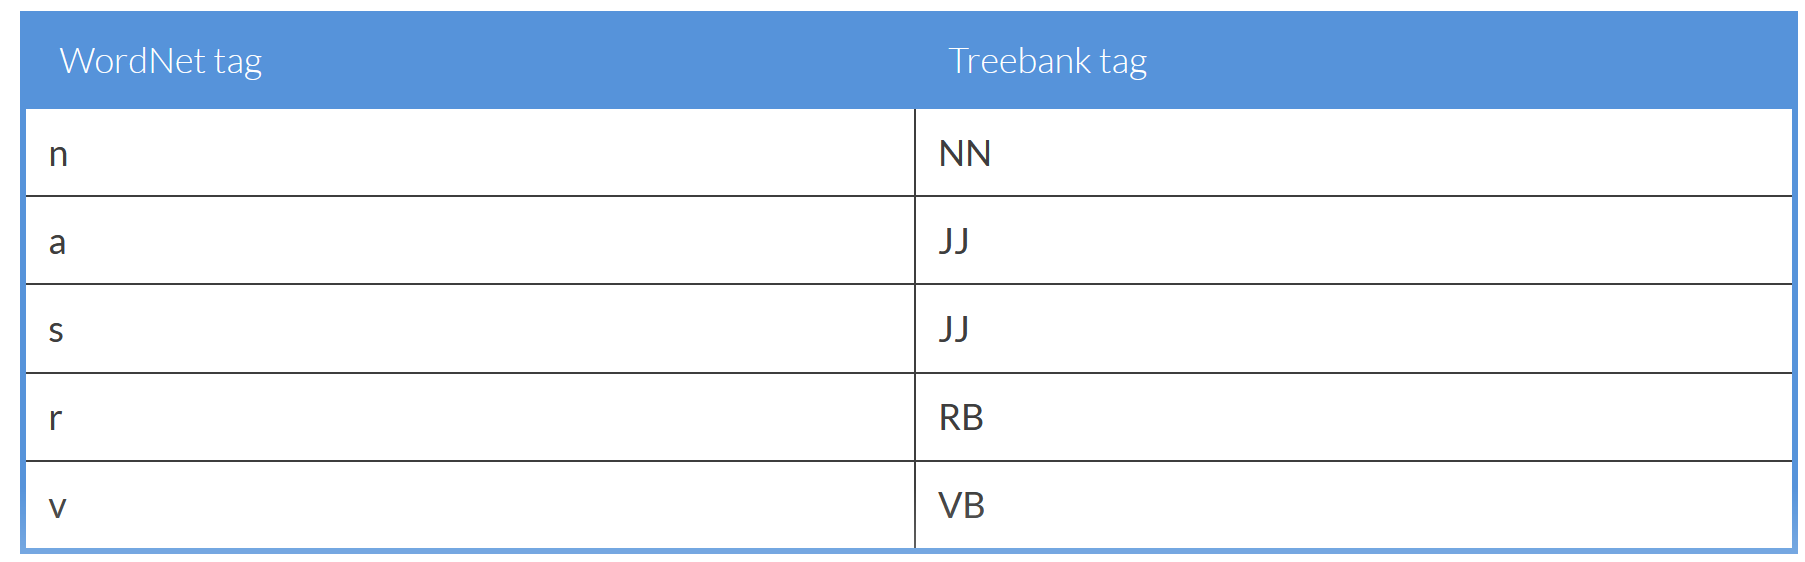

In [78]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_tok_sentence(tw):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sen = []
    for word, tag in pos_tag(tw):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        elif tag.startswith('J'):
            pos = 'a'
        else:
            pos = 'r'
        lemmatized_sen.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sen

In [109]:
print(positive_tweets_[0])
lemmatize_tok_sentence(positive_tweets[0])

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


['#FollowFriday',
 '@France_Inte',
 '@PKuchly57',
 '@Milipol_Paris',
 'for',
 'be',
 'top',
 'engage',
 'member',
 'in',
 'my',
 'community',
 'this',
 'week',
 ':)']

### Limpieza de caracteres basura

Despues de revisar los datos notamos 3 tipos de palabras que probablemnte no nos sean de mucha ayuda.  
  + "handles" que twitter utiliza para contestar
  + links a otras paginas web (pude que nos sirvan)
  + Puntuacion, pero no los smilies.

Haremos uso de expresiones regulares para remover estas palabras. (Si tienes poblemas googlea, esta es una operacion muy comun). 
+ "handles": Estos comienzan con @ seguidos de una palbra sin espacios ->
      "(@[A-Za-z0-9_]+)"
+ "link": Comienzan con http -> 

      "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
+ La puntuacion puede ser removida como stopword o puntuacion. Hay que tener cuidado especial, pues los smilies son formados por puntuacion [  :), :(  ]  
  
Podemos sustituir esta palabras por vacio o espacios.

In [105]:
import re, string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def clean_lemmatize(tweet_tokens, stop_words = stopwords.words('english')):

    cleaned_tokens = []
    for token, tag in pos_tag(tweet_tokens):
        # Limpiar url
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]'\
        '|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", token)
        # Limpiar handle
        token = re.sub('(@[A-Za-z0-9_]+)',"", token)

        # Tag for lemmatizer
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        elif tag.startswith('J'):
            pos = 'a'
        else:
            pos = 'r'
        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        # Eliminar puntuacion o espacios
        if len(token) > 0 and token not in string.punctuation and \
        token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [108]:
print(positive_tweets_[0])
clean_lemmatize(positive_tweets[0])

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']